# YouTube Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we will be analyzing YouTube text data including positive and negative comments, tags, likes, dislikes and emojis etc. on YouTube videos.

We have 4 datasets in this project. These files are :

* GBcomments.csv
* GBvideos.csv
* UScomments.csv
* USvideos.csv

"GBcomments.csv" file and "UScomments.csv" file are including video_id, comment_text, likes, and replies columns. 
"GBvideos.csv" file and "USvideos.csv" file are including video_id, title, channel_title, category_id, tags, views, likes, dislikes, comment_total, thumbnail_link and date columns.

**Variable Descriptions:**  

**video_id:** the id of the video on YouTube

**comment_text:** the comment text in the video

**likes:** number of likes 

**dislikes:** number of dislikes 

**replies:** number of reply

**title:** title of the video on YouTube

**channel_title:** title of the channel 

**category_id:** category id of the video 

**tags:** tags of the video

**views:** number of views 

**comment_total:** total comments on the video

**thumbnail_link:** the link of thumbnail

**date:** the date of the comment 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
comments=pd.read_csv('GBcomments.csv', error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [ ]:
comments.head(), comments.tail()

(      video_id                                       comment_text  likes  \
 0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
 1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
 2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
 3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
 4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
 
    replies  
 0        0  
 1        0  
 2        0  
 3        0  
 4        0  ,
            video_id                     comment_text  likes  replies
 718447  lLN1FwiqGwc          MEME ME MEME ME MEME ME      0        0
 718448  lLN1FwiqGwc  Yeah, but does everybody float?      0        0
 718449  lLN1FwiqGwc              That meme me dace 😂      0        0
 718450  lLN1FwiqGwc   10:43 Is that Miles Upshur????      2        0
 718451  lLN1FwiqGwc              WA-HA\nWA-HA\nWA-HA      1        0)

### Data Cleaning

In [ ]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [ ]:
comments.dropna(inplace=True)
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

<a id='eda'></a>
## Exploratory Data Analysis

**Analyzing The Positive and Negative Comments**

In [ ]:
#pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity #An example for sentiment analysis

0.45000000000000007

In [ ]:
comments.head() #We will be focusing on comment_text column for our sentiment/polarity analysis in here.

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [ ]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [ ]:
comments['polarity']=polarity #Creating our polarity column in here.
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [ ]:
comments_positive=comments[comments['polarity']==1]
comments_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [ ]:
comments_positive.shape

(20400, 5)

In [ ]:
#pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords=set(STOPWORDS)
list_stopwords=list(stopwords)
list_stopwords[:10] #The words we will ignore in our text comments

['any',
 'who',
 'with',
 "shan't",
 'to',
 'under',
 "don't",
 "here's",
 "aren't",
 'cannot']

In [ ]:
comments_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [ ]:
total_comments=' '.join(comments_positive['comment_text']) #We combined the comment_text column into total_comments in here. 

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments) #stopwords=stopwords with this argument we eliminated our stopwords' words in here.  

(-0.5, 999.5, 499.5, -0.5)

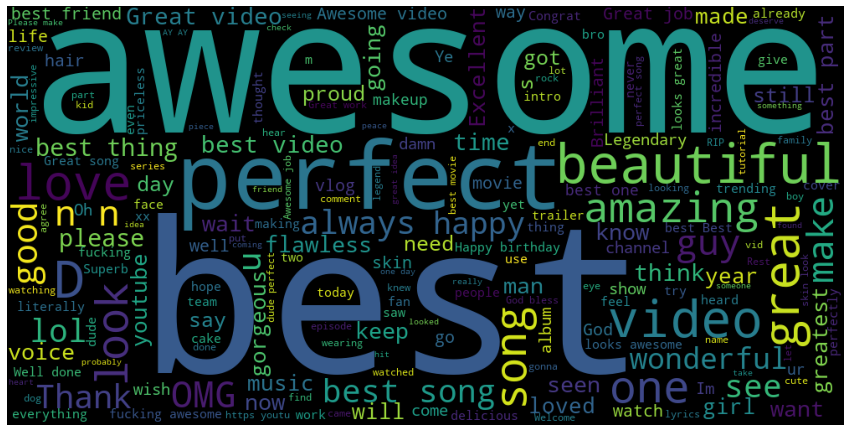

In [ ]:
plt.figure(figsize=(15,13))
plt.imshow(wordcloud) #we used imshow() in here to show the wordcloud
plt.axis('off') #we removed the axis

In [ ]:
comments_negative=comments[comments['polarity']==-1]
comments_negative.head()

video_id                                       comment_text  likes  \
1387  ql0Op1VcELw                                             boring      0   
1394  ql0Op1VcELw                  0:22   **laughs at terrible pun**      1   
1530  -Ifnaxi2LQg          this is the worst thing i've heard. ever.      0   
1745  F2uJvwiSZAQ  People making jokes about 9/11 is truly disgus...      1   
1793  F2uJvwiSZAQ                                      Thats insane.      0   

      replies  polarity  
1387        0      -1.0  
1394        1      -1.0  
1530        0      -1.0  
1745        0      -1.0  
1793        0      -1.0

In [ ]:
total_comments=' '.join(comments_negative['comment_text'])

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

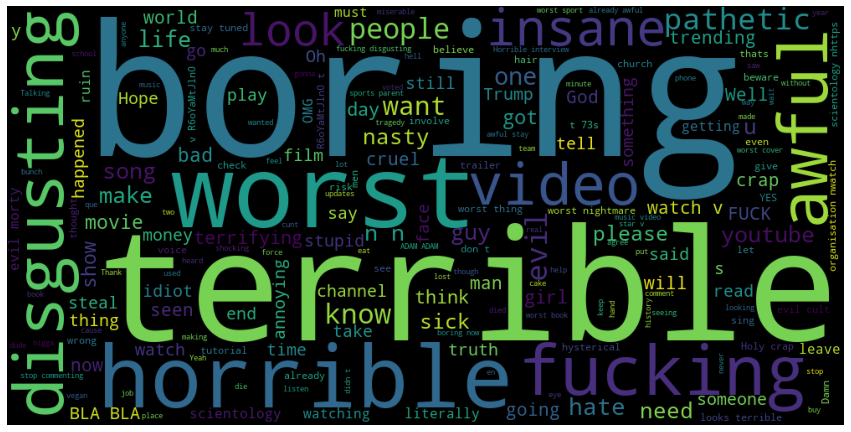

In [ ]:
plt.figure(figsize=(15,13))
plt.imshow(wordcloud)
plt.axis('off')

Based on our wordclouds we can see that positive comments are mostly "awesome", "perfect", "omg", "beautifl" and "best", negative comments are mostly "terrible", "fucking", "boring", "horrible" and "worst".

**Analyzing The Trending Tags**

In order to analyze "tags" we need to use our "USvideos.csv" file in here. Let's start off reading our file first.

In [ ]:
videos=pd.read_csv('USvideos.csv',error_bad_lines=False)
videos.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [ ]:
videos['tags'] #This is our "tags" column.

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [ ]:
tags_complete=' '.join(videos['tags']) #we will combine the "tags" into 1 text in here.

In [ ]:
import re #regular expression module 

In [ ]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete) #sub, substitution and we have excluded [] all without A-zA-Z with space ' ' in here.

In [ ]:
tags=re.sub(' +',' ',tags) #we removed extra spaces between our words in tags text in here.

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

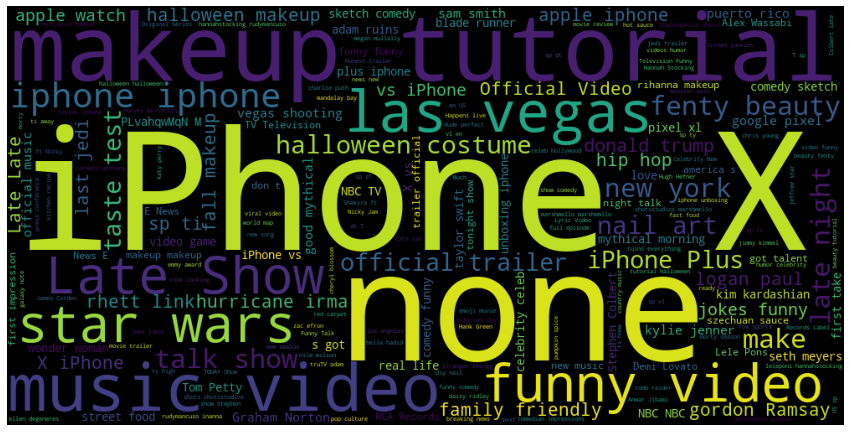

In [ ]:
plt.figure(figsize=(15,13))
plt.imshow(wordcloud)
plt.axis('off'); #Bu figure ile Youtube daki trending tags lerimiz ortaya çıkmış oldu. 

Based on our wordclouds we can see that the trending tags are "iPhone X", "none", "makeup", "tutorial" and "las vegas".

**Perform Analysis on Likes, Dislikes, Views and How They Are Correlated with Each Other**

In [ ]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

Text(0.5, 1.0, 'Regression Plot for Views and Likes')

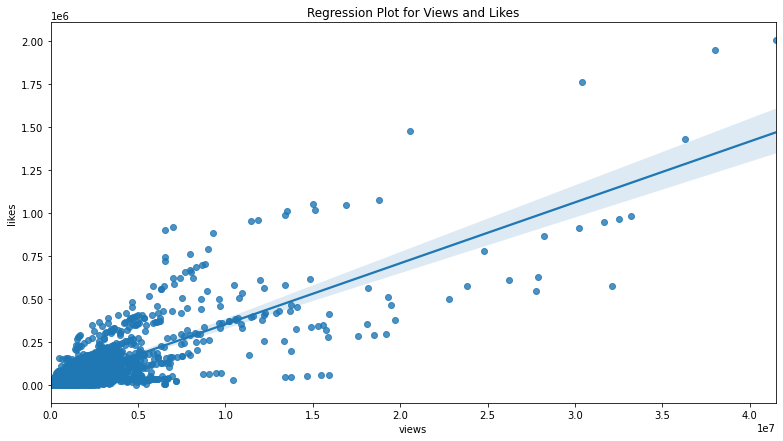

In [ ]:
plt.figure(figsize=(13,7))
sns.regplot(data=videos, x='views', y='likes')
plt.title('Regression Plot for Views and Likes')

Text(0.5, 1.0, 'Regression Plot for Dislikes and Views')

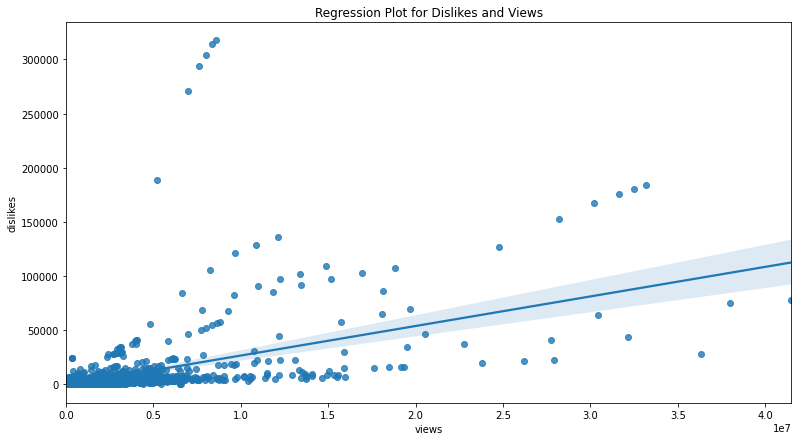

In [ ]:
plt.figure(figsize=(13,7))
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression Plot for Dislikes and Views')

In [ ]:
df_corr=videos[['views','likes','dislikes']]
df_corr.corr() #we see in here that how they are correlated to each other.

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

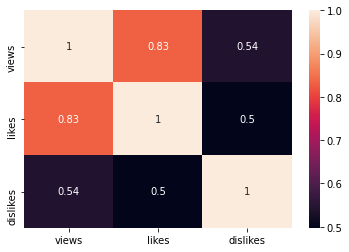

In [ ]:
sns.heatmap(df_corr.corr(),annot=True)

Regarding our "heatmap" and "regression plots" we can see that "views" and "likes" have a strong correlation between each other with a correlation coefficient of 0.83 in here. 

**Analyzing of Emojis in Comments**

In [ ]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [ ]:
comments['comment_text'][1] #we can see that here we have some "unicode character" associated with each and every emojis.

'To be there with a samsung phone\\n😂😂😂'

In [ ]:
print('\U0001F600') #In here we can see the unicode character of the emoji.

😀


In [ ]:
#!pip install advertools

In [ ]:
import advertools as adv

In [ ]:
emoji_dict=adv.extract_emoji(comments['comment_text'])
emoji_list=emoji_dict['emoji']

In [ ]:
emoji_list[1] #An example of the emojis.

['😂', '😂', '😂']

In [ ]:
emoji_list= [i for i in emoji_list if i]
emoji_list[:10]

[['😂', '😂', '😂'],
 ['😭', '😭', '😭', '😢', '😢', '😢'],
 ['❤️', '❤️'],
 ['😂'],
 ['👏'],
 ['👇', '👇', '👇', '👇', '👇', '👇', '👇', '👇', '👇', '👇'],
 ['🌞'],
 ['😎', '😣', '😥', '😫', '😭'],
 ['✌️'],
 ['😂']]

In [ ]:
emoji_list = [item for sublist in emoji_list for item in sublist]

In [ ]:
from collections import Counter
counts = Counter(emoji_list)

In [ ]:
counts.most_common()[:10]

[('😂', 43947),
 ('😍', 34856),
 ('❤️', 21080),
 ('❤', 15676),
 ('🔥', 10249),
 ('😭', 9098),
 ('💕', 6531),
 ('😘', 6334),
 ('😬', 5489),
 ('♥', 5483)]

In [ ]:
sorted_emojis=sorted(counts.items(),key=lambda x:x[1],reverse=True)
sorted_emojis[:20]

[('😂', 43947),
 ('😍', 34856),
 ('❤️', 21080),
 ('❤', 15676),
 ('🔥', 10249),
 ('😭', 9098),
 ('💕', 6531),
 ('😘', 6334),
 ('😬', 5489),
 ('♥', 5483),
 ('😊', 4946),
 ('💖', 4809),
 ('👍', 4448),
 ('💜', 3616),
 ('👏', 3573),
 ('💗', 3071),
 ('💙', 2968),
 ('😁', 2504),
 ('🤣', 2374),
 ('😱', 2316)]

In [ ]:
keys=[] #To define axes of plot
values=[]

for i in sorted_emojis[:20]:
    keys.append(i[0]),values.append(i[1])

In [ ]:
df=pd.DataFrame({'chars':keys,'num':values}) #we prepared our dataframe in here.
df.head()

chars    num
0     😂  43947
1     😍  34856
2    ❤️  21080
3     ❤  15676
4     🔥  10249

In [ ]:
#!pip install plotly

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
emojis_plot=go.Bar(x=df['chars'],y=df['num'])                         
iplot([emojis_plot])

In our sequentially ordered bar chart we can infer that top 3 emojis mostly seen in YouTube videos' comments are "😂","😍" and "❤️". Also, we can see that the top 3 emojis are including approximately 100k emojis in total over all emojis and the least common emojis seen in Youtube videos' comments are "😱".

<a id='conclusions'></a>
## Conclusions

In this project we infer so many diversed reckonings based on YouTube videos' comments, likes, dislikes and emojis.

At first, according to our wordclouds we can see that the top 3 positive comments are "awesome", "perfect", "omg", and top 3 negative comments are "terrible", "fucking" and "boring". 

When we check our worldclouds based on our trending tags we can also see that the top 5 tags are "iPhone X", "none", "makeup", "tutorial" and "las vegas".

Regarding our correlation analysis on the likes, dislikes and views of YouTube videos, we can see that "views" and "likes" have a strong correlation between each other with a correlation coefficient of 0.83

Lastly, we try to see the dispersion of the emojis in YouTube videos' comments. Based on our analysis we can see that the top 3 emojis mostly seen in YouTube videos' comments are "😂","😍" and "❤️" and the top 3 emojis are including approximately 100k emojis in total over all emojis.